In [87]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [88]:
#读取数据
transform = transforms.Compose([transforms.Resize((32*32)), transforms.ToTensor()])
train_data = datasets.MNIST(root="./data", train=True, download=True,transform=transform)
test_data = datasets.MNIST(root="./data", train=False, download=True, transform=transform)


In [89]:
train_data,test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                Resize(size=1024, interpolation=PIL.Image.BILINEAR)
                ToTensor()
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: Compose(
                Resize(size=1024, interpolation=PIL.Image.BILINEAR)
                ToTensor()
            ))

In [90]:
#创建数据加载器
batch_size = 16
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers = 0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers = 0)


In [91]:
# 查看数据
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_targets)
print(example_data.shape)

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7])
torch.Size([16, 1, 1024, 1024])


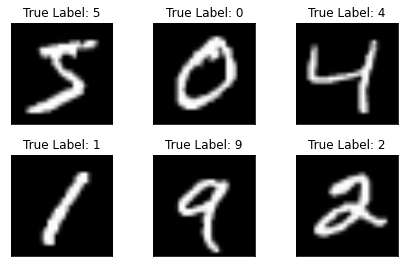

In [92]:
# 图像可视化
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("True Label: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [93]:
import torch.nn as nn
import torch.nn.functional as F
class MLP4(nn.Module):
    def __init__(self,input_dim, hidden_dim, num_class):
        super(MLP4, self).__init__()

        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, 200)
        self.linear3 = nn.Linear(200, 150)
        self.linear4 = nn.Linear(150, 100)
        self.linear5 = nn.Linear(100, num_class)

    def forward(self, data):
        #先将图片数据转化为1*784的张量
        data = data.view(-1, 28*28)
        data = F.relu(self.linear1(data))
        data = F.relu((self.linear2(data)))
        data = F.relu((self.linear3(data)))
        data = F.relu((self.linear4(data)))
        data = F.log_softmax(data, dim = 1)
        return data

In [94]:
import numpy
import torch.nn as nn
import torch
import torch.nn.functional as F
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.linear1 = nn.Linear(16*5*5, 120)
        self.linear2 = nn.Linear(120, 84)
        self.linear3 = nn.Linear(84, 10)
    #***************************
    # 代码补充完整
    #***************************
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 16*5*5)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        #***************************
        # 代码补充完整
        #***************************
        return x

In [95]:
#input_size = 28*28
#hidden_size = 500
#class_num = 10
epochs = 10

model = LeNet()

print(model)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=400, out_features=120, bias=True)
  (linear2): Linear(in_features=120, out_features=84, bias=True)
  (linear3): Linear(in_features=84, out_features=10, bias=True)
)


In [96]:
import torch.optim as optim
loss_function = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.01) 

In [100]:
total_step = len(train_loader)

for epoch in range(epochs):
    train_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output,target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    train_loss = train_loss / len(train_loader.dataset)
    print('Epoch:  {}  \tTraining Loss: {:.6f}'.format(epoch + 1, train_loss))

RuntimeError: shape '[-1, 400]' is invalid for input of size 16386304

In [99]:
correct = 0
total = 0
with torch.no_grad():  # 训练集中不需要反向传播
    for data in test_loader:
        images, labels = data
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

RuntimeError: shape '[-1, 400]' is invalid for input of size 16386304